# Fashion MNIST: Classification using MLP

In [1]:
# Load Fashion MNIST data from TensorFlow
import tensorflow as tf

# Load the Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist

In [2]:
# Split data into training, validation and test sets
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train, y_train, X_valid, y_valid = X_train_full[:-5000], y_train_full[:-5000], X_train_full[-5000:], y_train_full[-5000:]

In [3]:
print("Training data shape: ", X_train.shape, y_train.shape)
print("Validation data shape: ", X_valid.shape, y_valid.shape)
print("Test data shape: ", X_test.shape, y_test.shape)

Training data shape:  (55000, 28, 28) (55000,)
Validation data shape:  (5000, 28, 28) (5000,)
Test data shape:  (10000, 28, 28) (10000,)


In [4]:
X_train.dtype

dtype('uint8')

In [5]:
# Convert the data to float32 and scale the pixel values to the range [0, 1]
X_train, X_valid, X_test = X_train.astype('float32') / 255.0, X_valid.astype('float32') / 255.0, X_test.astype('float32') / 255.0

In [6]:
X_train.dtype

dtype('float32')

In [7]:
y_train[0]

9

In [8]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Ankle boot'

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

c:\Users\shahr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7797 - loss: 0.6199 - val_accuracy: 0.8550 - val_loss: 0.3999
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8642 - loss: 0.3693 - val_accuracy: 0.8634 - val_loss: 0.3529
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8800 - loss: 0.3278 - val_accuracy: 0.8718 - val_loss: 0.3579
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8880 - loss: 0.3038 - val_accuracy: 0.8698 - val_loss: 0.3497
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8932 - loss: 0.2835 - val_accuracy: 0.8852 - val_loss: 0.3196
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8998 - loss: 0.2695 - val_accuracy: 0.8854 - val_loss: 0.3187
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9059 - loss: 0.2499 - val_accuracy: 0.8780 - val_loss: 0.3315
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9085 - loss: 0.2437 - 

In [16]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: ", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.8826 - loss: 0.3313
Test accuracy:  0.8848000168800354


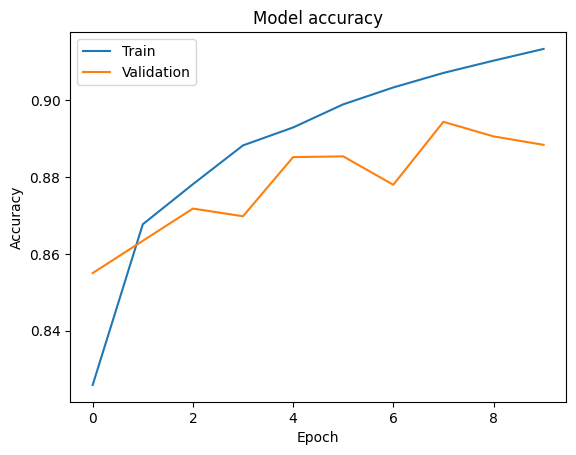

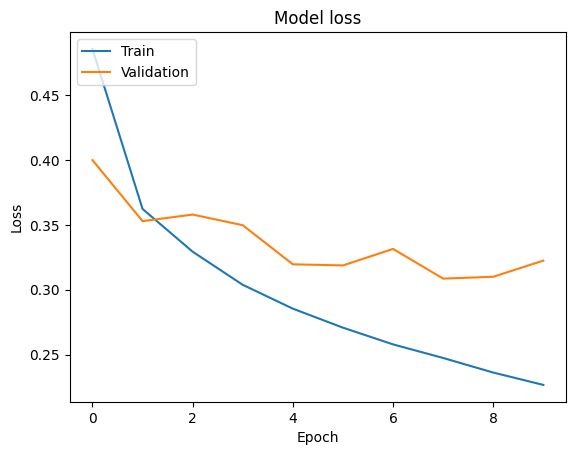

In [17]:
# Plot training and validation accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [18]:
X_new = X_test[:3]

In [19]:
y_proba = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [20]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)